# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [3]:
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
print(users.isna().sum())
print(users.isna().mean())

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [11]:
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

En el dataset 'Users', hay dos columnas que contienen valores faltantes: 'City', con 11% de nulos, y 'churn_date', con 88% de nulos. Por su parte el dataset 'Usage' tiene 3 columnas con valores faltantes: 'date', con 0.1%, 'duration', con 55% y 'length' con 44%

Para la columna churn_date, que es la que más valores faltantes tiene, no la eliminaría ya que es un dato muy importante. Ignoraría los valores faltantes ya que esos significan que la persona no ha abandonado el servicio.
Para 'city', 'duration' y 'length' investigaría si imputar o dejar nulos. Tocaría mirar más a fondo la distribuición y que tipo de valor faltante son.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.

El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
# explorar columnas numéricas de users

columnas_numericas = ['age', 'user_id']
print(users[columnas_numericas].describe())


               age       user_id
count  4000.000000   4000.000000
mean     33.739750  11999.500000
std     123.232257   1154.844867
min    -999.000000  10000.000000
25%      32.000000  10999.750000
50%      47.000000  11999.500000
75%      63.000000  12999.250000
max      79.000000  13999.000000


- La columna `user_id` tiene un rango consistente y no parece tener valores muy atípicos
- La columna `age` cuenta con un sentinel claro, que es el minimo siendo -999. La edad no puede ser negativa ni llegar a ese valor. Probablemente representa un dato faltante. Esto tambien disorsiona la media y desviación, especialmente esta última que llega a 123 que también es un valor muy improbable para una edad.

In [13]:
# explorar columnas numéricas de usage
columnas_numericas = ['id', 'user_id']
print(usage[columnas_numericas].describe())

                id       user_id
count  40000.00000  40000.000000
mean   20000.50000  12002.405975
std    11547.14972   1157.279564
min        1.00000  10000.000000
25%    10000.75000  10996.000000
50%    20000.50000  12013.000000
75%    30000.25000  13005.000000
max    40000.00000  13999.000000


- Las columnas `id` y `user_id` no presentan valores atípicos y tienen un rango consistente
- Las columnas son de valores identificadores de usuarios. Tenemos 40000 'id', lo cual es consistente con el numero de valores en la base de datos.

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
print(users[columnas_user].describe())
print(users[columnas_user].value_counts())

          city    plan
count     3531    4000
unique       7       2
top     Bogotá  Basico
freq       808    2595
city      plan   
Bogotá    Basico     522
CDMX      Basico     474
Medellín  Basico     398
GDL       Basico     298
Bogotá    Premium    286
MTY       Basico     275
Cali      Basico     262
CDMX      Premium    256
Medellín  Premium    218
Cali      Premium    162
GDL       Premium    152
MTY       Premium    132
?         Basico      65
          Premium     31
dtype: int64


- La columna `city` cuenta con 7 categorías, siendo Bogotá la más frecuente con 808 registros. Cuenta con un valor sentinel de "?"
- La columna `plan` cuenta con 2 categorías, predominada por el plan básico con 2595 usuarios

In [15]:
# explorar columna categórica de usage
print(usage['type'].describe())
print(usage['type'].value_counts())

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object
text    22092
call    17908
Name: type, dtype: int64


- La columna `type` tiene 2 categorías únicas, siendo la más fecuente 'text' con 22,092 registros


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?

Encontré un sentinel en la columna 'age' de la base 'Users', un valor de -999.
Mi acción sería reemplazar este valor.
Encontré un sentinel en la columna 'city' de la base 'Users', que es un valor "?". Mi acción sería dejar como valor nulo.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors="coerce")

In [17]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors="coerce")

In [18]:
# Revisar los años presentes en `reg_date` de users
users["reg_year"] = users["reg_date"].dt.year

print(users["reg_year"].value_counts().sort_index())

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_year, dtype: int64


En `reg_date`, los registros tienen un valor consisente de 2022 a 2024, pero no aparecen registros de 2026 a pesar de que los datos van hasta 2024

In [19]:
# Revisar los años presentes en `date` de usage
usage["year"] = usage["date"].dt.year

print(usage["year"].value_counts().sort_index())

2024.0    39950
Name: year, dtype: int64


En `date`, solo hay datos para el año 2024. Como en la base de datos hay 40000 registros y acá solo aparecen 39950, hay 50 registros que no tienen un año identificado

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

Aparecen 40 registros para el año 2026 en la base de users, y 50 registros sin año en la base usage. En ambos casos los dejaría como valores nulos (NaT)

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'].median()
users['age'] = users['age'].replace(-999, pd.NA)
users['age'] = users['age'].fillna(age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [21]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace("?", pd.NA)

# Verificar cambios
users['city'].describe()

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [22]:

# Marcar fechas futuras como NA para reg_date
fecha_min = pd.to_datetime('2020-01-01')
fecha_max = pd.to_datetime('2024-12-31')

# Marcar como NaN las fechas fuera de rango
users.loc[(users['reg_date'] < fecha_min) | (users['reg_date'] > fecha_max), 'reg_date'] = pd.NaT

# Verificar cambios
print(users["reg_date"].dt.year.value_counts().sort_index())

2022.0    1314
2023.0    1316
2024.0    1330
Name: reg_date, dtype: int64


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [23]:
# Verificación MAR en usage (Missing At Random) para duration
usage["duration"].isna().groupby(usage["type"]).mean().sort_values(ascending=False).head(10)

type
text    0.999276
call    0.000000
Name: duration, dtype: float64

In [24]:
# Verificación MAR en usage (Missing At Random) para length
usage["length"].isna().groupby(usage["type"]).mean().sort_values(ascending=False).head(10)

type
call    0.99933
text    0.00000
Name: length, dtype: float64

Se observó que el 99.9% de los registros tipo text presentan valores faltantes tanto en 'duration' como en 'length', mientras que call no tiene valores nulos.
Esto indica que estas variables tienen un missingness tipo MAR. 

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [25]:

# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas
usage["call_duration"] = usage["duration"] * usage["is_call"]

# Agrupar información por usuario
usage_agg = usage.groupby("user_id").agg({'is_text': 'sum', 'is_call': 'sum', 'call_duration': 'sum'
}).reset_index()

# observar resultado
usage_agg.head(3)


,user_id,is_text,is_call,call_duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [26]:
# Renombrar columnas
usage.rename(columns={
    'is_text': 'cant_mensajes',
    'is_call': 'cant_llamadas',
    'call_duration': 'cant_minutos_llamada'
}, inplace=True)

usage_agg = usage.groupby("user_id").agg({'cant_mensajes': 'sum', 'cant_llamadas': 'sum', 'cant_minutos_llamada': 'sum'
}).reset_index()

# observar resultado
usage_agg.head(3)


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [27]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = usage_agg.merge(users, on='user_id', how='left')
user_profile.head(5)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,reg_year
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,2022
1,10001,5,10,33.18,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,2022
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,2022
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,2022
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,2022


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [28]:
# Resumen estadístico de las columnas numéricas
user_profile.describe()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,age,reg_year
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,11999.729432,5.524381,4.478120,22.836934,48.124531,2023.034259
std,1154.898108,2.358416,2.144238,16.590213,17.692032,0.865997
min,10000.000000,0.000000,0.000000,0.000000,18.000000,2022.000000
25%,10999.500000,4.000000,3.000000,11.095000,33.000000,2022.000000
50%,12000.000000,5.000000,4.000000,19.740000,47.000000,2023.000000
75%,12999.500000,7.000000,6.000000,31.185000,63.000000,2024.000000
max,13999.000000,17.000000,15.000000,155.690000,79.000000,2026.000000


In [29]:
# Distribución porcentual del tipo de plan
(user_profile['plan'].value_counts(normalize=True)).sort_index()

Basico     0.648662
Premium    0.351338
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

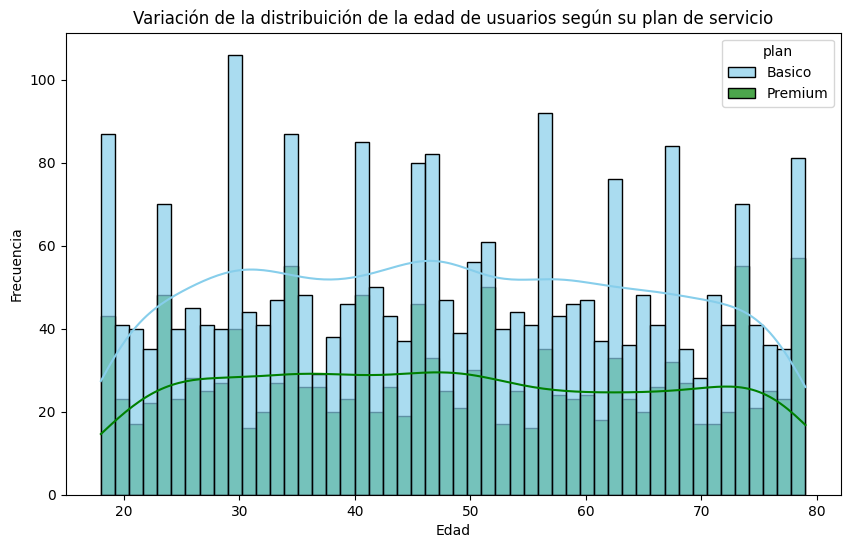

In [30]:
# Histograma para visualizar la edad (age)
plt.figure(figsize=(10, 6))
sns.histplot(data=users, x='age', bins=50, hue='plan', palette=['skyblue','green'], kde=True, alpha=0.7)
plt.title('Variación de la distribuición de la edad de usuarios según su plan de servicio')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()



💡Insights: 
- Se puede ver que ambos planes tienen un rango amplio de edades, variando desde los 18 a los 80 años. No hay picos muy llamativos en ningún rango.
  
- No se ve un sesgo fuerte de edades hacia planes premium o básico, pero se ve que hay mayor volumen de usuarios con plan básico que plan premium.

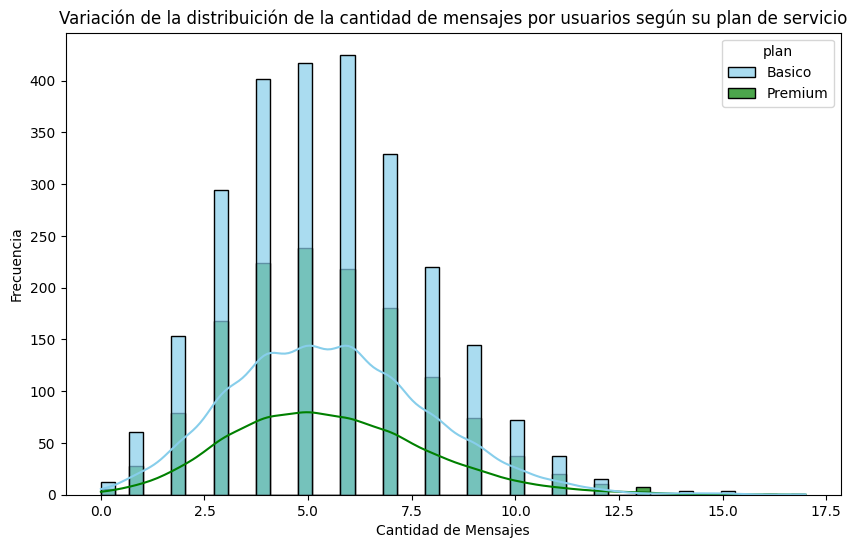

In [31]:
# Histograma para visualizar la cant_mensajes
plt.figure(figsize=(10, 6))
sns.histplot(data=user_profile, x='cant_mensajes', bins=50, hue='plan', palette=['skyblue','green'], kde=True, alpha=0.7)
plt.title('Variación de la distribuición de la cantidad de mensajes por usuarios según su plan de servicio')
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Ambos planes tienen una distribuición normal y la mayor concentración se ve entre 3 y 7 mensajes. Hay una pequeña cola hacia la derecha. 

- Hay más usuarios en el plan básico que el plan premium pero el pico de mensajes de ambos está en alrededor de 5 mensajes para ambos.

- El plan básico es el que tiene la cola a la derecha, el plan premium se concentra más en el promedio

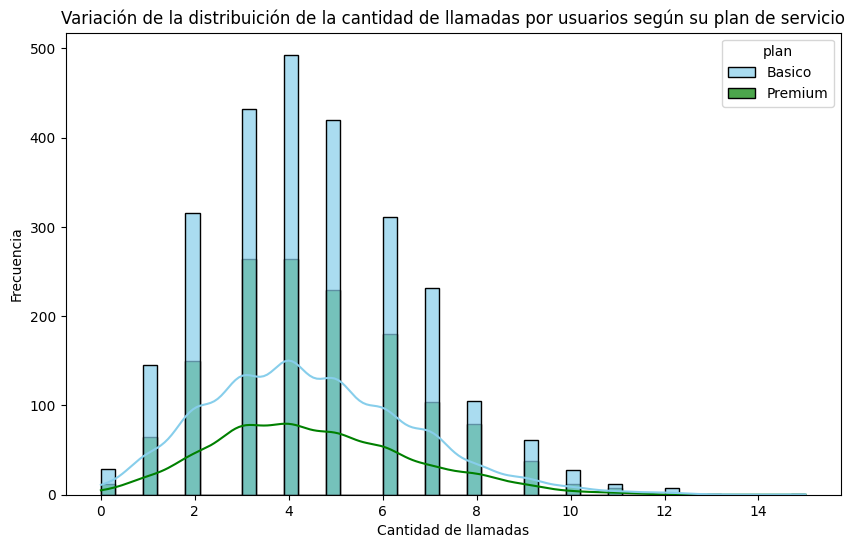

In [32]:
# Histograma para visualizar la cant_llamadas
plt.figure(figsize=(10, 6))
sns.histplot(data=user_profile, x='cant_llamadas', bins=50, hue='plan', palette=['skyblue','green'], kde=True, alpha=0.7)
plt.title('Variación de la distribuición de la cantidad de llamadas por usuarios según su plan de servicio')
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Tanto Básico como Premium muestran una forma parecida con mayor concentración entre 3 y 6 llamadas por usuario.

- Hay una ligera cola hacia la derecha en ambos planes, llegando a los aproximadamente 12 mensajes, pero no son muchos

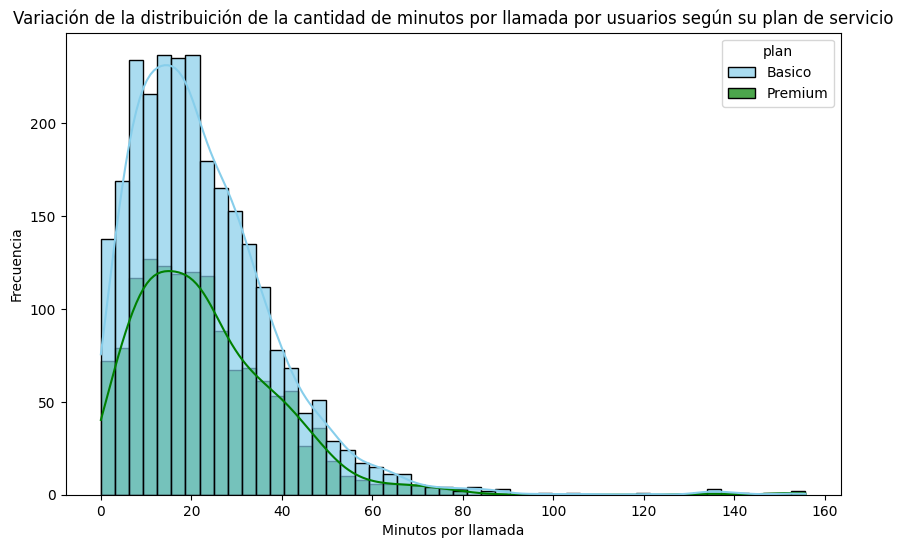

In [33]:
# Histograma para visualizar la cant_minutos_llamada
plt.figure(figsize=(10, 6))
sns.histplot(data=user_profile, x='cant_minutos_llamada', bins=50, hue='plan', palette=['skyblue','green'], kde=True, alpha=0.7)
plt.title('Variación de la distribuición de la cantidad de minutos por llamada por usuarios según su plan de servicio')
plt.xlabel('Minutos por llamada')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Hay una distrubuición sesgada a la derecha, y la mayoría de llamadas duran entre 5 y 30 minutos. Hay pocos casos de llamadas muy largas

- En ambos planes hay un patrón muy similar y tienen formas casi idénticas,

- Como se vió en en los otros histogramas, hay un mayor volumen de usuarios en el plan básico que el plan premium, y se ve una mayor frecuencia de llamadas en ese plan.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:
  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

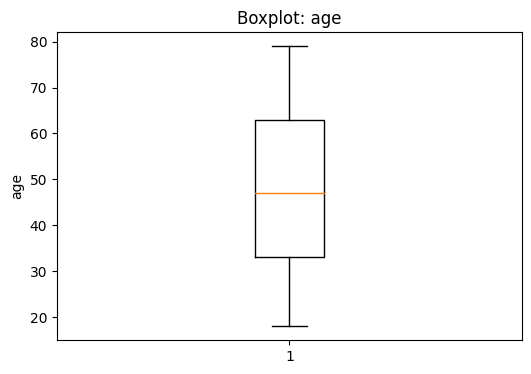

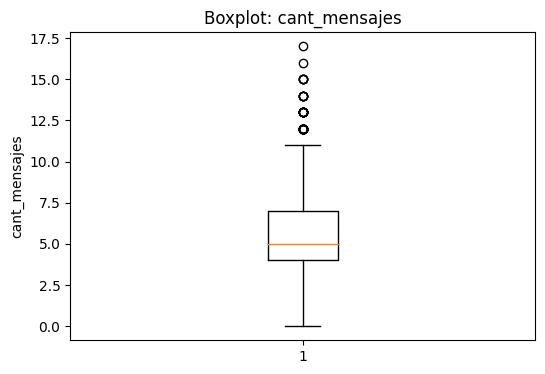

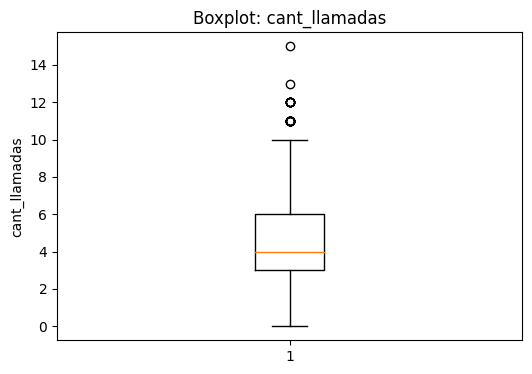

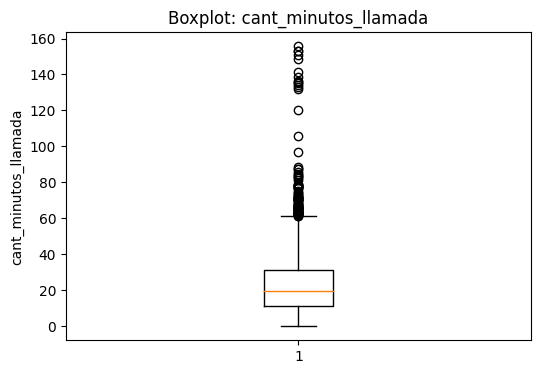

In [34]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize=(6,4))
    plt.boxplot(user_profile[col].dropna())
    plt.title(f'Boxplot: {col}')
    plt.ylabel(col)
    plt.show()

💡Insights: 
- Age: no presenta outliers
- cant_mensajes: existen outliers, con algunos valores arriba de 12 mensajes
- cant_llamadas: existen outliers, con algunos valores arriba de 10 llamadas
- cant_minutos_llamada: existen outliers, con algunos valores arriba de 60 minutos por llamada

In [37]:
# Calcular límites con el método IQR

columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    print(f'Variable: {col}')
    print(f'IQR: {IQR}')
    print(f'Límite inferior: {lower_limit}')
    print(f'Límite superior: {upper_limit}')



Variable: cant_mensajes
IQR: 3.0
Límite inferior: -0.5
Límite superior: 11.5
Variable: cant_llamadas
IQR: 3.0
Límite inferior: -1.5
Límite superior: 10.5
Variable: cant_minutos_llamada
IQR: 20.09
Límite inferior: -19.04
Límite superior: 61.31999999999999


In [38]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,22.836934
std,2.358416,2.144238,16.590213
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.095000
50%,5.000000,4.000000,19.740000
75%,7.000000,6.000000,31.185000
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: Dado que 17 mensajes no es un valor imposible y su distancia del Q3 (7) no es muy alta, se decide mantener los outliers
- cant_llamadas: Dado que 15 llamadas no es un valor imposible y puede representar usuarios más activos, se decide mantener los outliers
- cant_minutos_llamada: 155 si es un outlier más pronunciado y es mucho más alto que el promedio. Hay que revisar si se trata de un caso especifico y si es un error en la imputación de la información

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [39]:
# Crear columna grupo_uso
def grupo_uso(user_profile):
    mensajes = user_profile['cant_mensajes']
    llamadas = user_profile['cant_llamadas']

    if llamadas < 5 & mensajes < 5:
        return "Bajo uso"
    elif llamadas < 10 & mensajes < 10:
        return "Uso medio"
    else:
        return "Alto uso"

user_profile["grupo_uso"] = user_profile.apply(grupo_uso, axis=1)

In [40]:
# verificar cambios
user_profile.head()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,reg_year,grupo_uso
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,2022,Alto uso
1,10001,5,10,33.18,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,2022,Alto uso
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,2022,Alto uso
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,2022,Alto uso
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,2022,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [41]:
# Crear columna grupo_edad
def grupo_edad(user_profile):
    age = user_profile['age']
    if age < 30:
        return "Joven"
    elif age < 60:
        return "Adulto"
    else:
        return "Adulto Mayor"

user_profile["grupo_edad"] = user_profile.apply(grupo_edad, axis=1)

In [42]:
# verificar cambios
user_profile.head()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,reg_year,grupo_uso,grupo_edad
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,2022,Alto uso,Adulto
1,10001,5,10,33.18,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,2022,Alto uso,Adulto
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,2022,Alto uso,Adulto
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,2022,Alto uso,Adulto Mayor
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,2022,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

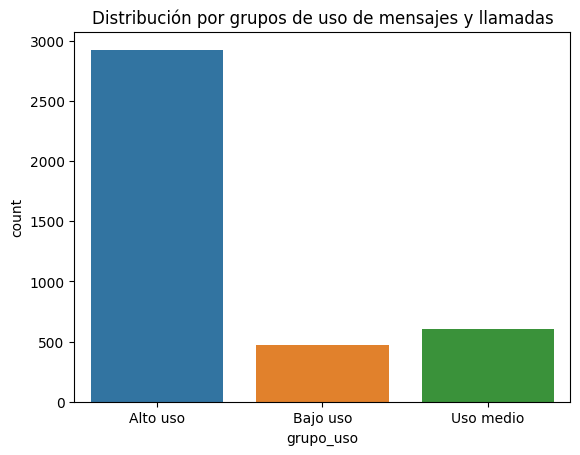

In [46]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x='grupo_uso')
plt.title('Distribución por grupos de uso de mensajes y llamadas')

plt.show()

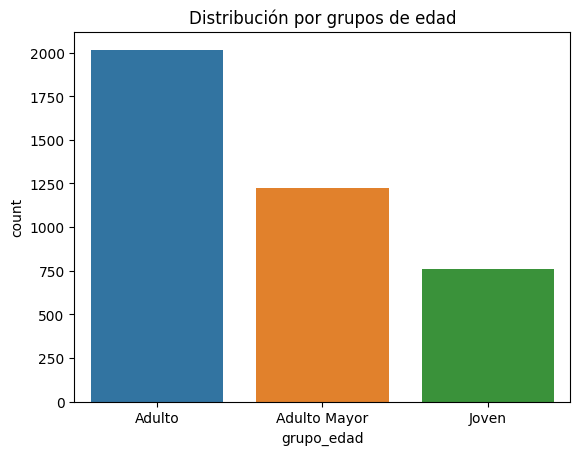

In [44]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x='grupo_edad')
plt.title('Distribución por grupos de edad')

plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- En el dataset 'Users', se encontraron dos columnas que contienen valores faltantes: 'City', con 11% de nulos, y 'churn_date', con 88% de nulos. Por su parte el dataset 'Usage' cuenta con 3 columnas con valores faltantes: 'date', con 0.1%, 'duration', con 55% y 'length' con 44%.
- Se encontraron dos sentinels en la base de datos 'Users': uno en la columna 'age' de un valor de -999 y otro en la columna 'city', que es un valor "?". Ambos se corrigieron reemplazando el -999 po la mediana y '?' dejándolo como valor nulo.
- Aparecieron 40 registros para el año 2026 en la base 'Users' cuando la base debe ir hasta 2024. Se reemplazaron estos valores por valores nulos. 

🔍 **Segmentos por Edad**
- Se encontró que los usuarios adultos entre los 30 y 60 años son los que más usan el servicio, seguidos de los adltos mayores de 60 años. Los jóvenes (menores de 30 años), son los que menos frecuentan el servicio.
- En el análisis de histogramas por edad vimos que no había outliers notables y que el servicio se distribuye equitativamente por edades desde 18 a 80 años.

📊 **Segmentos por Nivel de Uso**
- Vemos que los clientes que tienen mayor frecuencia son los que dan un alto uso al servicio telefónico, con una frecuencia notablemente más alta que la de uso medio y la de uso bajo.
- Vimos varios outliers en cantidad de llamadas, cantidad de mensajes y minutos por llamada sesgados a la derecha, mostrando que unos pocos usuarios realizaban más llamadas y mensajes que el promedio, al igual que llamadas mucho más largas que las del resto de usuarios.


➡️ Esto sugiere que el cliente típico de la compañía son los adultos de 30 a 60 años con alto uso del servicio. Vimos también que el plan básico tiene mayor uso que el plan premium. 


💡 **Recomendaciones**
- Se recomienda impulsar el plan premium para los clientes actuales de alto uso, mejorándolo con aún más beneficios como llamadas y mensajes ilimitados, al igual que descuentos por permanencia. Esto daría más uso al plan premium sin necesidad de conseguir nuevos clientes. 
- También se recomienda que se debe capturar el mercado jóven ofreciendo planes enfocados en el internet ilimitado y descuentos estudiantiles, ya que esto es importante en ese mercado. 

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`